In [137]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt


In [138]:
def calc_precision_k(ans_pos_list, k):
    precision_sum = 0.0
    for ans_pos in ans_pos_list:
        np_ans_pos = np.array(json.loads(ans_pos))
        precision_sum += len(np_ans_pos[np_ans_pos <= k]) / k
    return precision_sum / len(ans_pos_list)

In [139]:
def calc_recall_k(ans_pos_list, total_relevant_list, k):
    recall_sum = 0.0
    for i, ans_pos in enumerate(ans_pos_list):
        np_ans_pos = np.array(json.loads(ans_pos))
        recall_sum += len(np_ans_pos[np_ans_pos <= k]) / total_relevant_list[i]
    return recall_sum / len(ans_pos_list)

In [140]:
df = pd.read_csv('../DuReader_reformatted/DuReader_for_db-sample10000-anspos.csv', sep='\t', index_col=0)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9858 entries, 4858963 to 6400825
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   question            9858 non-null   object
 1   total_relevant_cnt  9858 non-null   int64 
 2   retrieved_rela_cnt  9858 non-null   int64 
 3   ans_pos             9858 non-null   object
 4   src                 9858 non-null   object
 5   ground_truth        9858 non-null   object
dtypes: int64(2), object(4)
memory usage: 539.1+ KB


In [141]:
precision_list = [calc_precision_k(df['ans_pos'].tolist(), k) for k in range(1, 11)]
recall_list = [calc_recall_k(df['ans_pos'].tolist(), df['total_relevant_cnt'].tolist(), k) for k in range(1, 11)]


In [142]:
pr_info_df = pd.DataFrame({'precision': precision_list, 'recall': recall_list, 'k': [k for k in range(1, 11)]})
pr_info_df


,precision,recall,k
0,0.548286,0.014555,1
1,0.539968,0.028377,2
2,0.531886,0.041942,3
3,0.525360,0.055104,4
4,0.518969,0.067511,5
5,0.514235,0.079562,6
6,0.509188,0.091195,7
7,0.504425,0.102269,8
8,0.499820,0.112789,9
9,0.495364,0.122586,10


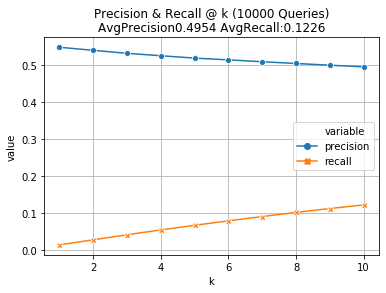

In [143]:
sns.lineplot(data=pd.melt(pr_info_df, ['k']), x="k", y='value', hue="variable", style="variable", markers=True, dashes=False)
title_str = 'Precision & Recall @ k (10000 Queries)'
result_str = 'AvgPrecision' + str(round(precision_list[-1], 4)) + ' AvgRecall:' + str(round(recall_list[-1], 4))
plt.title(title_str + '\n' + result_str)
plt.grid()
plt.savefig('./DuReader/'+ title_str.replace(' ', '-') +'.png', dpi=300)